# Lab 1

First off, I shall create a cell to import some useful pieces, that way I do not forget to do so later when I need it.

In [56]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## A little statistics

### 1B. Integrating the standard normal distribution.
First, I shall use the stats.norm.cdf() error function. I will also display the z table value found on wikipedia (the link provided in the lab instructions).

In [20]:
#       error function       z-table
print(str(stats.norm.cdf(0)) + " = 0.5")
print(str(stats.norm.cdf(0.6)) + " = 0.72575")
print(str(stats.norm.cdf(1)) + " = 0.84134")

0.5 = 0.5
0.7257468822499265 = 0.72575
0.8413447460685429 = 0.84134


### 1C. The other way.

I shall now use stats.norm.ppf() to show the sigma value of a given probability. I shall choose probabilities associated with 1, 2, and 5 sigma.

In [27]:
print(str(stats.norm.ppf(0.84134)) + " = 1 sigma")
print(str(stats.norm.ppf(0.97725)) + " = 2 sigma")
print(str(stats.norm.ppf(0.9999997133484281)) + " = 5 sigma")

0.9999803859660787 = 1 sigma
2.0000024438996027 = 2 sigma
4.999999999970176 = 5 sigma


### 1D. Explaining the negatives

We are integrating from infinity to the sigma value we give, which goes to zero at probabilities of 50%. This 50% indicates that there is a 1/2 chance a event will be on eitherside of that probability. This is what 0 sigma means, that we are at the mean value for the distribution. For sigmas reporting as negative, we can interpret the values differently, knowing that a "negative" sigma is actually just sigma away from the mean on the left side of the mean, rather than the right. The negative sign merely shows which side of the mean the sigma is on.

### 2. A different distribution

Make both the analytic pdf() and a relization with ~100k samples using a built-in distribution. I shall choose the exponential distribution.

The exponential distribution is a special case of the gamma distribution, 
with *a = 1*. The scipy function is stats.gamma.rvs(1, samples) for our purposes.

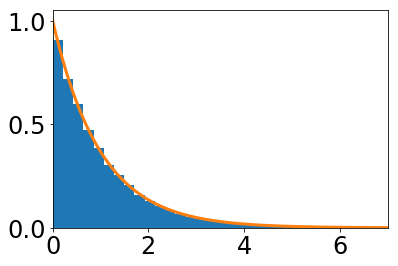

In [37]:
samples = stats.gamma.rvs(1, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(samples, 50, density = True)
plt.tick_params(labelsize = 24)
plt.xlim([0, 7])
x = np.linspace(0, 7, 1000)
ax.plot(x, stats.gamma.pdf(x, 1), linewidth = 3, alpha = 1)

### 3. Signal-free distribution

You have a measurement for which you need to decide 'sigma'.

### 3A. Select a value for your hypothetical measurement.

I shall choose the value 4.2, for it is The Answer divided by 10.

### 3B. Statistical question

For the given measurement, find the probability that the measurement is not noise. 

### 3C. Convert to math

Integral_(measurement value) ^(infinity) (exponential function) dx

### 4D. and 4E. Calculate probability and Sigma

In [45]:
measurement = 4.2
probability = stats.gamma.cdf(measurement, 1)
print(str(100*probability) + "% probability of signal")
#Calculate sigma on a normal with the probability
sigma = stats.norm.ppf(probability)
print(str(sigma) + " sigma")

98.50044231795223% probability of signal
2.170207190096744 sigma


measurements = np.linspace(0, 7, 71)
for _idx in range(0, len(measurements)):
    print("Measurement: " + str(measurements[_idx]))
    prob = stats.gamma.cdf(measurements[_idx], 1)
    print(str(100*probability) + "% probability of signal")
    sigma = stats.norm.ppf(probability)
    print(str(sigma) + " sigma \n")

print("Measurements complete")

## Non-Continuous Distributions

binomial